# 在线性回归模型中使用梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

In [3]:
x

array([ 1.40087424,  1.68837329,  1.35302867,  1.45571611,  1.90291591,
        0.02540639,  0.8271754 ,  0.09762559,  0.19985712,  1.01613261,
        0.40049508,  1.48830834,  0.38578401,  1.4016895 ,  0.58645621,
        1.54895891,  0.01021768,  0.22571531,  0.22190734,  0.49533646,
        0.0464726 ,  1.45464231,  0.68006988,  0.39500631,  1.81835919,
        1.95669397,  1.06560509,  0.5182637 ,  1.16762524,  0.65138131,
        1.77779863,  1.25280905,  1.63774738,  1.09469084,  0.83342401,
        1.48609438,  0.73919276,  0.15033309,  1.55038596,  0.43881849,
        0.15868425,  0.97356104,  0.3073478 ,  1.65693027,  0.38273714,
        0.54081791,  1.12206884,  1.80476078,  1.70357668,  0.83616392,
        0.78695254,  0.03244103,  0.59842674,  0.70755644,  1.78700533,
        1.57227314,  1.54277385,  0.84010971,  1.55205028,  0.92861629,
        0.36354033,  1.76805121,  1.43758454,  1.3437626 ,  0.51312727,
        0.86160364,  0.03290715,  0.46998765,  1.02234262,  0.58

In [4]:
y

array([  8.91412688,   8.89446981,   8.85921604,   9.04490343,
         8.75831915,   4.01914255,   6.84103696,   4.81582242,
         3.68561238,   6.46344854,   4.61756153,   8.45774339,
         3.21438541,   7.98486624,   4.18885101,   8.46060979,
         4.29706975,   4.06803046,   3.58490782,   7.0558176 ,
         4.04787249,   7.46699513,   7.17356576,   6.90706602,
        10.06445574,  10.46043335,   6.56186893,   7.41768066,
         6.63306338,   5.16962652,   8.92568927,   8.81142811,
         8.27497363,   9.55931293,   8.31763691,   8.39594229,
         6.46897919,   4.53407649,   9.01364797,   5.23131871,
         5.35968048,   4.92858955,   4.86197655,   8.18778792,
         3.53458796,   3.82545342,   7.06040408,  10.08420404,
        10.5135845 ,   5.57993775,   6.63546582,   2.56719372,
         6.94786703,   5.21927087,   9.54664436,   8.92205488,
         9.1083202 ,   7.66433039,   8.04596666,   7.0692907 ,
         6.52268065,   8.89229807,  11.53002966,   6.91

In [5]:
# 转换为100行，1列的数据
X = x.reshape(-1,1)

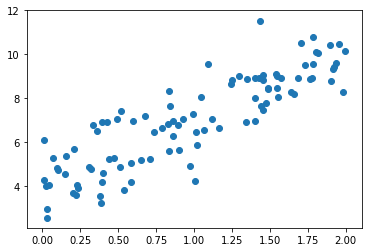

In [6]:
plt.scatter(x,y)
plt.show()

## 使用梯度下降训练法

### 定义一个损失函数

In [7]:
def J(theta, X_b, y):
    """
    给定θ，特征矩阵X，标记向量y，根据损失函数得出其（损失）值
    :param theta: 
    :param X_b: 
    :param y: 
    :return: 
    """
    
    # 分子部分其实等价于 (y - X_b.dot(theta)).T.dot(y - X_b.dot(theta))
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf') #防止溢出？有异常直接返回最大值
    

### 损失函数J的梯度

In [9]:
def derivative_J(theta:np.ndarray, X_b:np.ndarray, y:np.ndarray):
    """
    求θ为给定值时的导数
    :param theta: 
    :param X_b: 
    :param y: 
    :return: 
    """
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

### 梯度下降的方法

In [10]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    iters = 0
    while iters < n_iters:
        gradient = derivative_J(theta, X_b, y)
        last_theta = theta
        theta = theta - eta*gradient
        
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        iters += 1
    return theta

### 看看梯度下降的效果

In [11]:
X_b = np.hstack((np.ones((len(x),1)),X))
initial_theta = np.zeros(X_b.shape[1])  # 初始的θ向量都是0
eta = 0.01  # 学习率

theta = gradient_descent(X_b, y, initial_theta, eta)


In [12]:
theta

array([ 4.02145786,  3.00706277])

跟上边y = x * 3. + 4. + np.random.normal(size=100)的系数3 和截距4 结果很接近

### 测试我们刚刚封装好的线性回归算法

In [13]:
from playML.linear_regression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [14]:
lin_reg.coef_

array([ 3.00706277])

In [15]:
lin_reg.interception_

4.021457858204859